In [1]:
from results_loader import load_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reset_index makes a column called "index" with the column index
df = load_data('nontesting').reset_index()

In [4]:
def maybe_dictionary_len(d):
    if d != None:
        num_non_link = 0
        for k in d:
            dep_data = d[k]
            if not ("link" in dep_data and dep_data["link"]):
                num_non_link = num_non_link + 1
        return num_non_link
    else:
        return np.nan
        
df['npm_number_deps'] = df['npm solve'].apply(maybe_dictionary_len)
df['rosette_number_deps'] = df['rosette solve'].apply(maybe_dictionary_len)

In [5]:
df['ratio_num_deps'] = df['rosette_number_deps']/df['npm_number_deps']

In [6]:
df['ratio'] = df['rosette time'] / df['npm time']

In [7]:
df

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
0,0,supports-color,True,8.840439,"{'node_modules/has-flag': {'version': '5.0.1',...",None,True,2.382267,"{'node_modules/has-flag': {'version': '5.0.0',...",None,1.0,1.0,1.0,0.269474
1,1,debug,True,9.247350,"{'node_modules/ms': {'version': '2.1.2', 'reso...",None,True,2.343069,"{'node_modules/ms': {'version': '2.1.2', 'inte...",None,1.0,1.0,1.0,0.253377
2,2,semver,True,3.341806,{'node_modules/lru-cache': {'version': '6.0.0'...,None,True,2.364619,{'node_modules/lru-cache': {'version': '6.0.0'...,None,2.0,2.0,1.0,0.707587
3,3,chalk,True,9.310416,{'node_modules/ansi-styles': {'version': '4.3....,None,True,2.493104,{'node_modules/ansi-styles': {'version': '4.1....,None,5.0,5.0,1.0,0.267776
4,4,ms,True,2.577305,{},None,True,2.137862,{},None,0.0,0.0,NaN,0.829495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,is-directory,True,3.481128,{},None,True,2.414831,{},None,0.0,0.0,NaN,0.693692
996,996,whatwg-fetch,True,9.195429,{},None,True,2.465897,{},None,0.0,0.0,NaN,0.268165
997,997,decimal.js,True,0.402953,{},None,True,2.446546,{},None,0.0,0.0,NaN,6.071548
998,998,lodash.merge,True,0.403490,{},None,True,2.449112,{},None,0.0,0.0,NaN,6.069827


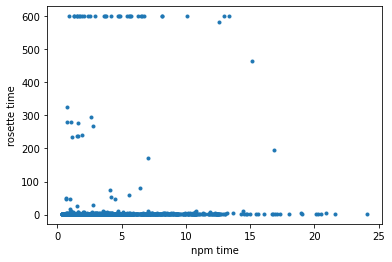

In [8]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.show()

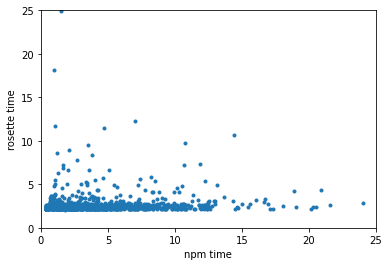

In [9]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.ylim([0, 25])
plt.xlim([0, 25])
plt.show()

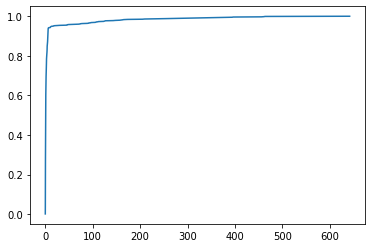

In [10]:
plt.plot(np.sort(df['ratio']), np.arange(1, len(df)+1)/len(df))
plt.show()

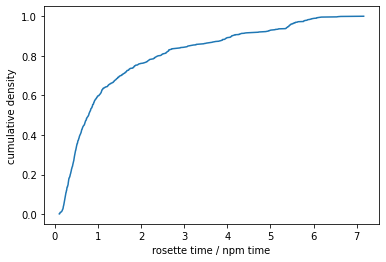

In [21]:
non_outlier_ratio = df['ratio'][df['ratio'] < 10]

plt.plot(np.sort(non_outlier_ratio), np.arange(1, len(non_outlier_ratio)+1)/len(non_outlier_ratio))
plt.xlabel('rosette time / npm time')
plt.ylabel('cumulative density')
plt.show()

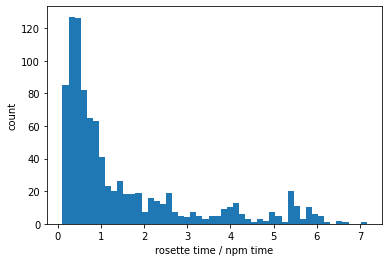

In [26]:
plt.hist(non_outlier_ratio, bins=50)
plt.xlabel('rosette time / npm time')
plt.ylabel('count')
plt.show()

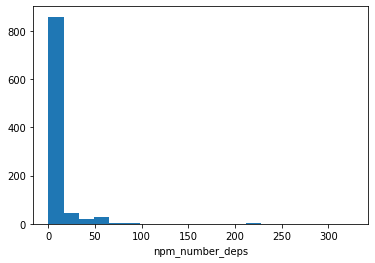

In [12]:
plt.hist(df['npm_number_deps'], bins=20)
plt.xlabel('npm_number_deps');

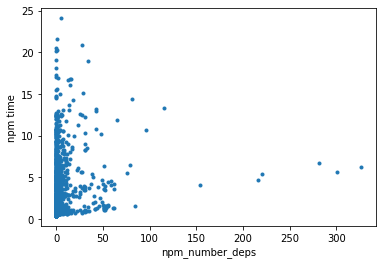

In [13]:
plt.scatter(x=df['npm_number_deps'], y=df['npm time'], marker='.')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('npm time') #y label
plt.show()

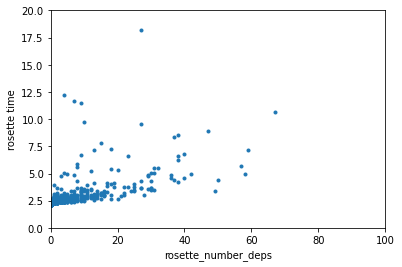

In [17]:
plt.scatter(x=df['rosette_number_deps'], y=df['rosette time'], marker='.')
plt.xlabel('rosette_number_deps') #x label
plt.ylabel('rosette time') #y label
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.show()

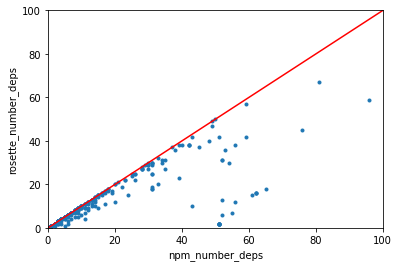

In [15]:
plt.scatter(x=df['npm_number_deps'], y=df['rosette_number_deps'], marker='.')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('rosette_number_deps') #y label
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

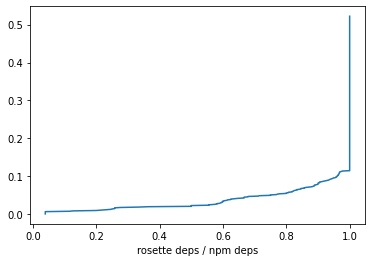

In [16]:
plt.plot(np.sort(df['ratio_num_deps']), np.arange(1, len(df['ratio_num_deps'])+1)/len(df['ratio_num_deps']))
plt.xlabel('rosette deps / npm deps')
plt.show()

In [32]:
df[(df['rosette success'] == False) & df['npm success']].sort_values('npm_number_deps')

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
968,968,@istanbuljs/load-nyc-config,True,10.088682,{'node_modules/argparse': {'version': '1.0.10'...,None,False,600.101990,None,"{'stage': 'install timeout', 'command': 'npm i...",13.0,NaN,NaN,59.482692
754,754,jest-each,True,0.935397,{'node_modules/@jest/types': {'version': '27.2...,None,False,600.101862,None,"{'stage': 'install timeout', 'command': 'npm i...",22.0,NaN,NaN,641.547508
972,972,copy-concurrently,True,5.704619,"{'node_modules/aproba': {'version': '1.2.0', '...",None,False,600.102401,None,"{'stage': 'install timeout', 'command': 'npm i...",27.0,NaN,NaN,105.195883
942,942,@eslint/eslintrc,True,5.618146,"{'node_modules/acorn': {'version': '8.5.0', 'r...",None,False,600.102497,None,"{'stage': 'install timeout', 'command': 'npm i...",28.0,NaN,NaN,106.815038
976,976,move-concurrently,True,3.677404,"{'node_modules/aproba': {'version': '1.2.0', '...",None,False,600.101760,None,"{'stage': 'install timeout', 'command': 'npm i...",28.0,NaN,NaN,163.186230
815,815,crypto-browserify,True,12.945039,"{'node_modules/asn1.js': {'version': '5.4.1', ...",None,False,600.102607,None,"{'stage': 'install timeout', 'command': 'npm i...",43.0,NaN,NaN,46.357729
641,641,@jest/test-result,True,1.296059,{'node_modules/@babel/code-frame': {'version':...,None,False,600.057264,None,"{'stage': 'install timeout', 'command': 'npm i...",44.0,NaN,NaN,462.986109
679,679,@jest/fake-timers,True,1.516454,{'node_modules/@babel/code-frame': {'version':...,None,False,600.101612,None,"{'stage': 'install timeout', 'command': 'npm i...",46.0,NaN,NaN,395.726948
745,745,@jest/environment,True,2.529956,{'node_modules/@babel/code-frame': {'version':...,None,False,600.102027,None,"{'stage': 'install timeout', 'command': 'npm i...",47.0,NaN,NaN,237.198593
772,772,jest-watcher,True,1.671375,{'node_modules/@babel/code-frame': {'version':...,None,False,600.102659,None,"{'stage': 'install timeout', 'command': 'npm i...",50.0,NaN,NaN,359.047279
